In [ ]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [3]:
#declaring


In [137]:
mkt2010=pd.read_csv('Resources/market_history_2010.csv', infer_datetime_format=True, parse_dates=True)
mkt2011=pd.read_csv('Resources/market_history_2011.csv', infer_datetime_format=True, parse_dates=True)
mkt2012=pd.read_csv('Resources/market_history_2012.csv', infer_datetime_format=True, parse_dates=True)
mkt2013=pd.read_csv('Resources/market_history_2013.csv', infer_datetime_format=True, parse_dates=True)
mkt2014=pd.read_csv('Resources/market_history_2014.csv', infer_datetime_format=True, parse_dates=True)
mkt2015=pd.read_csv('Resources/market_history_2015.csv', infer_datetime_format=True, parse_dates=True)
mkt2016=pd.read_csv('Resources/market_history_2016.csv', infer_datetime_format=True, parse_dates=True)
mkt2017=pd.read_csv('Resources/market_history_2017.csv', infer_datetime_format=True, parse_dates=True)
mkt2018=pd.read_csv('Resources/market_history_2018.csv', infer_datetime_format=True, parse_dates=True)
mkt2019=pd.read_csv('Resources/market_history_2019.csv', infer_datetime_format=True, parse_dates=True)
mkt2020=pd.read_csv('Resources/market_history_2020.csv', infer_datetime_format=True, parse_dates=True)

In [140]:
mkt2010_df=mkt2010.drop(['Tape A Shares','Tape B Shares','Tape C Shares','Tape A Notional','Tape B Notional','Tape C Notional','Tape A Trade Count','Tape B Trade Count','Tape C Trade Count'], axis = 1) 
mkt2011_df=mkt2011.drop(['Tape A Shares','Tape B Shares','Tape C Shares','Tape A Notional','Tape B Notional','Tape C Notional','Tape A Trade Count','Tape B Trade Count','Tape C Trade Count'], axis = 1) 
mkt2012_df=mkt2012.drop(['Tape A Shares','Tape B Shares','Tape C Shares','Tape A Notional','Tape B Notional','Tape C Notional','Tape A Trade Count','Tape B Trade Count','Tape C Trade Count'], axis = 1) 
mkt2013_df=mkt2013.drop(['Tape A Shares','Tape B Shares','Tape C Shares','Tape A Notional','Tape B Notional','Tape C Notional','Tape A Trade Count','Tape B Trade Count','Tape C Trade Count'], axis = 1) 
mkt2014_df=mkt2014.drop(['Tape A Shares','Tape B Shares','Tape C Shares','Tape A Notional','Tape B Notional','Tape C Notional','Tape A Trade Count','Tape B Trade Count','Tape C Trade Count'], axis = 1) 
mkt2015_df=mkt2015.drop(['Tape A Shares','Tape B Shares','Tape C Shares','Tape A Notional','Tape B Notional','Tape C Notional','Tape A Trade Count','Tape B Trade Count','Tape C Trade Count'], axis = 1) 
mkt2016_df=mkt2016.drop(['Tape A Shares','Tape B Shares','Tape C Shares','Tape A Notional','Tape B Notional','Tape C Notional','Tape A Trade Count','Tape B Trade Count','Tape C Trade Count'], axis = 1) 
mkt2017_df=mkt2017.drop(['Tape A Shares','Tape B Shares','Tape C Shares','Tape A Notional','Tape B Notional','Tape C Notional','Tape A Trade Count','Tape B Trade Count','Tape C Trade Count'], axis = 1) 
mkt2018_df=mkt2018.drop(['Tape A Shares','Tape B Shares','Tape C Shares','Tape A Notional','Tape B Notional','Tape C Notional','Tape A Trade Count','Tape B Trade Count','Tape C Trade Count'], axis = 1) 
mkt2019_df=mkt2019.drop(['Tape A Shares','Tape B Shares','Tape C Shares','Tape A Notional','Tape B Notional','Tape C Notional','Tape A Trade Count','Tape B Trade Count','Tape C Trade Count'], axis = 1) 
mkt2020_df=mkt2020.drop(['Tape A Shares','Tape B Shares','Tape C Shares','Tape A Notional','Tape B Notional','Tape C Notional','Tape A Trade Count','Tape B Trade Count','Tape C Trade Count'], axis = 1) 


In [141]:
combined_MKT=pd.concat([mkt2010_df,mkt2011_df,mkt2012_df,mkt2013_df,mkt2014_df,mkt2015_df,mkt2016_df,mkt2017_df,mkt2018_df,mkt2019_df,mkt2020_df], axis='rows',join='inner')

In [142]:
combined_MKT.head(3)

,Day,Market Participant,Total Shares,Total Notional,Total Trade Count
0,2010-12-31,AMEX (A),25083128.0,4.231774e+08,96923
1,2010-12-31,BEX (B),96986204.0,2.496656e+09,517244
2,2010-12-31,NSX (C),28307821.0,6.299394e+08,106939


In [114]:
#MKT_part=combined_MKT.groupby('Market Participant').sum()

In [143]:
MKT_part=combined_MKT.sort_values(by='Market Participant')

In [145]:
MKT_part.head()

,Day,Market Participant,Total Shares,Total Notional,Total Trade Count
1628,2014-07-17,ADF (D),60967215.0,2.241300e+09,287284
1992,2014-06-10,ADF (D),53951601.0,1.713916e+09,250348
2006,2014-06-09,ADF (D),54126311.0,1.846032e+09,255333
2020,2014-06-06,ADF (D),53847554.0,1.867987e+09,246091
2034,2014-06-05,ADF (D),64442278.0,2.043151e+09,279310


In [146]:
#set an index by dates
MKT_part.set_index(['Day'], drop=True, inplace=True)

In [149]:
#Convert to daily dates
MKT_part.index = pd.DatetimeIndex(data=MKT_part.index)

#Convert to strings
MKT_part.index = MKT_part.index.strftime('%Y')

In [150]:
MKT_part=MKT_part.reset_index()

In [151]:
l=MKT_part.groupby('index').sum()

In [152]:
l.head(11)

,Total Shares,Total Notional,Total Trade Count
index,,,
2010,2.135634e+12,5.912426e+13,7265593566
2011,1.974858e+12,6.378478e+13,7652472807
2012,1.609339e+12,5.270091e+13,6175228046
2013,1.559231e+12,5.611218e+13,5952593978
2014,1.616477e+12,6.546682e+13,7572168526
2015,1.741808e+12,7.009831e+13,8205202463
2016,1.851935e+12,6.876751e+13,8746575142
2017,1.638362e+12,6.805883e+13,7725739303
2018,1.837773e+12,8.969978e+13,9177287983


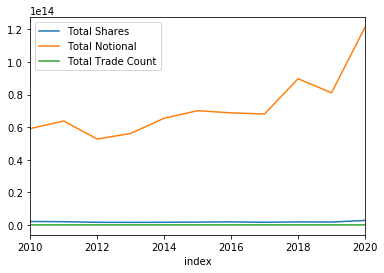

In [154]:
l.plot() #basic plotting